# Projeto para Departamento de Recursos Humanos

Este projeto tem como objetivo prever se um funcionário está propenso a deixar a empresa. Para isso, é utilizado um modelo de regressão logística, treinado em uma base de dados com dados de funcionários de uma empresa.


## Importação das bibliotecas e base de dados

- Base de dados: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
- Cálculo de salário: https://www.mom.gov.sg/employment-practices/salary/monthly-and-daily-salary e https://sprout.zendesk.com/hc/en-us/articles/360030922133-How-to-Calculate-for-the-Daily-Rate-from-Your-Monthly-Salary-
- Stock: https://www.moneyunder30.com/employee-stock-options#:~:text=Typically%20they%20are%20granted%20to,a%20specific%20period%20of%20time.

In [6]:
# Bibliotecas que serão utilizadas no projeto

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [7]:
# Importando base de dados em csv e transformando em um dataframe python

employee_df = pd.read_csv('Human_Resources.csv')

In [8]:
# Número de linha e colunas da base de dados

employee_df.shape

(1470, 35)

In [9]:
# Verificação das primeiras 5 linhas da base de dados:

employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Sobre a base de dados**


**Education:**
1 'Below College',
2 'College',
3 'Bachelor',
4 'Master',
5 'Doctor'


**EnvironmentSatisfaction:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'


**JobInvolvement:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'


**JobSatisfaction:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'


**PerformanceRating:**
1 'Low',
2 'Good',
3 'Excellent',
4 'Outstanding'


**RelationshipSatisfaction:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'


**WorkLifeBalance:**
1 'Bad',
2 'Good',
3 'Better',
4 'Best'

O atributo **Attrition** será a classe que vamos prever. Em tradução
livre, quer dizer se o funcionário possui atrito, ou seja, se está propenso a deixar a empresa

In [10]:
# Informações gerais sobre a base de dados:

employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
# Estatísticas descritivas dos dados:

employee_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## Visualização dos dados

**Preparação dos Dados**

Para facilitar a análise e o treinamento do modelo, algumas transformações nos dados foram realizadas:

In [12]:
# Conversão da coluna "Attrition" para valores binários (0 para "No" e 1 para "Yes"):

employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [13]:
# Conversão das colunas "OverTime" e "Over18" para valores binários:

employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [14]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Análise e Visualização dos Dados**


Foram realizadas diversas análises e visualizações dos dados para entender melhor o comportamento dos funcionários e identificar padrões que possam influenciar na decisão de deixar a empresa.

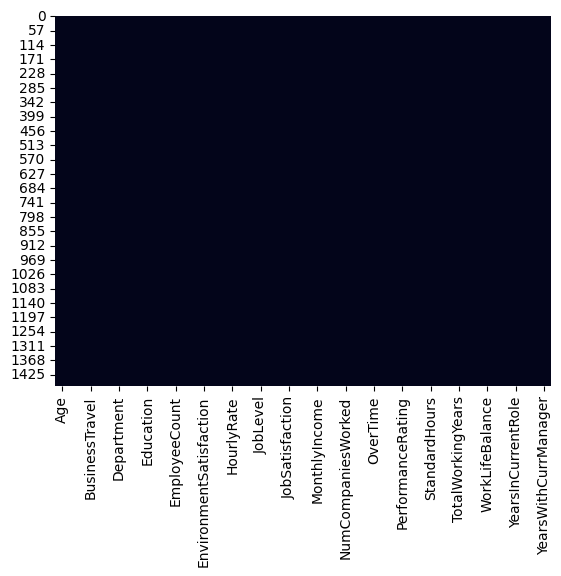

In [15]:
# Heatmap de valores nulos na base de dados:

sns.heatmap(employee_df.isnull(), cbar = False);

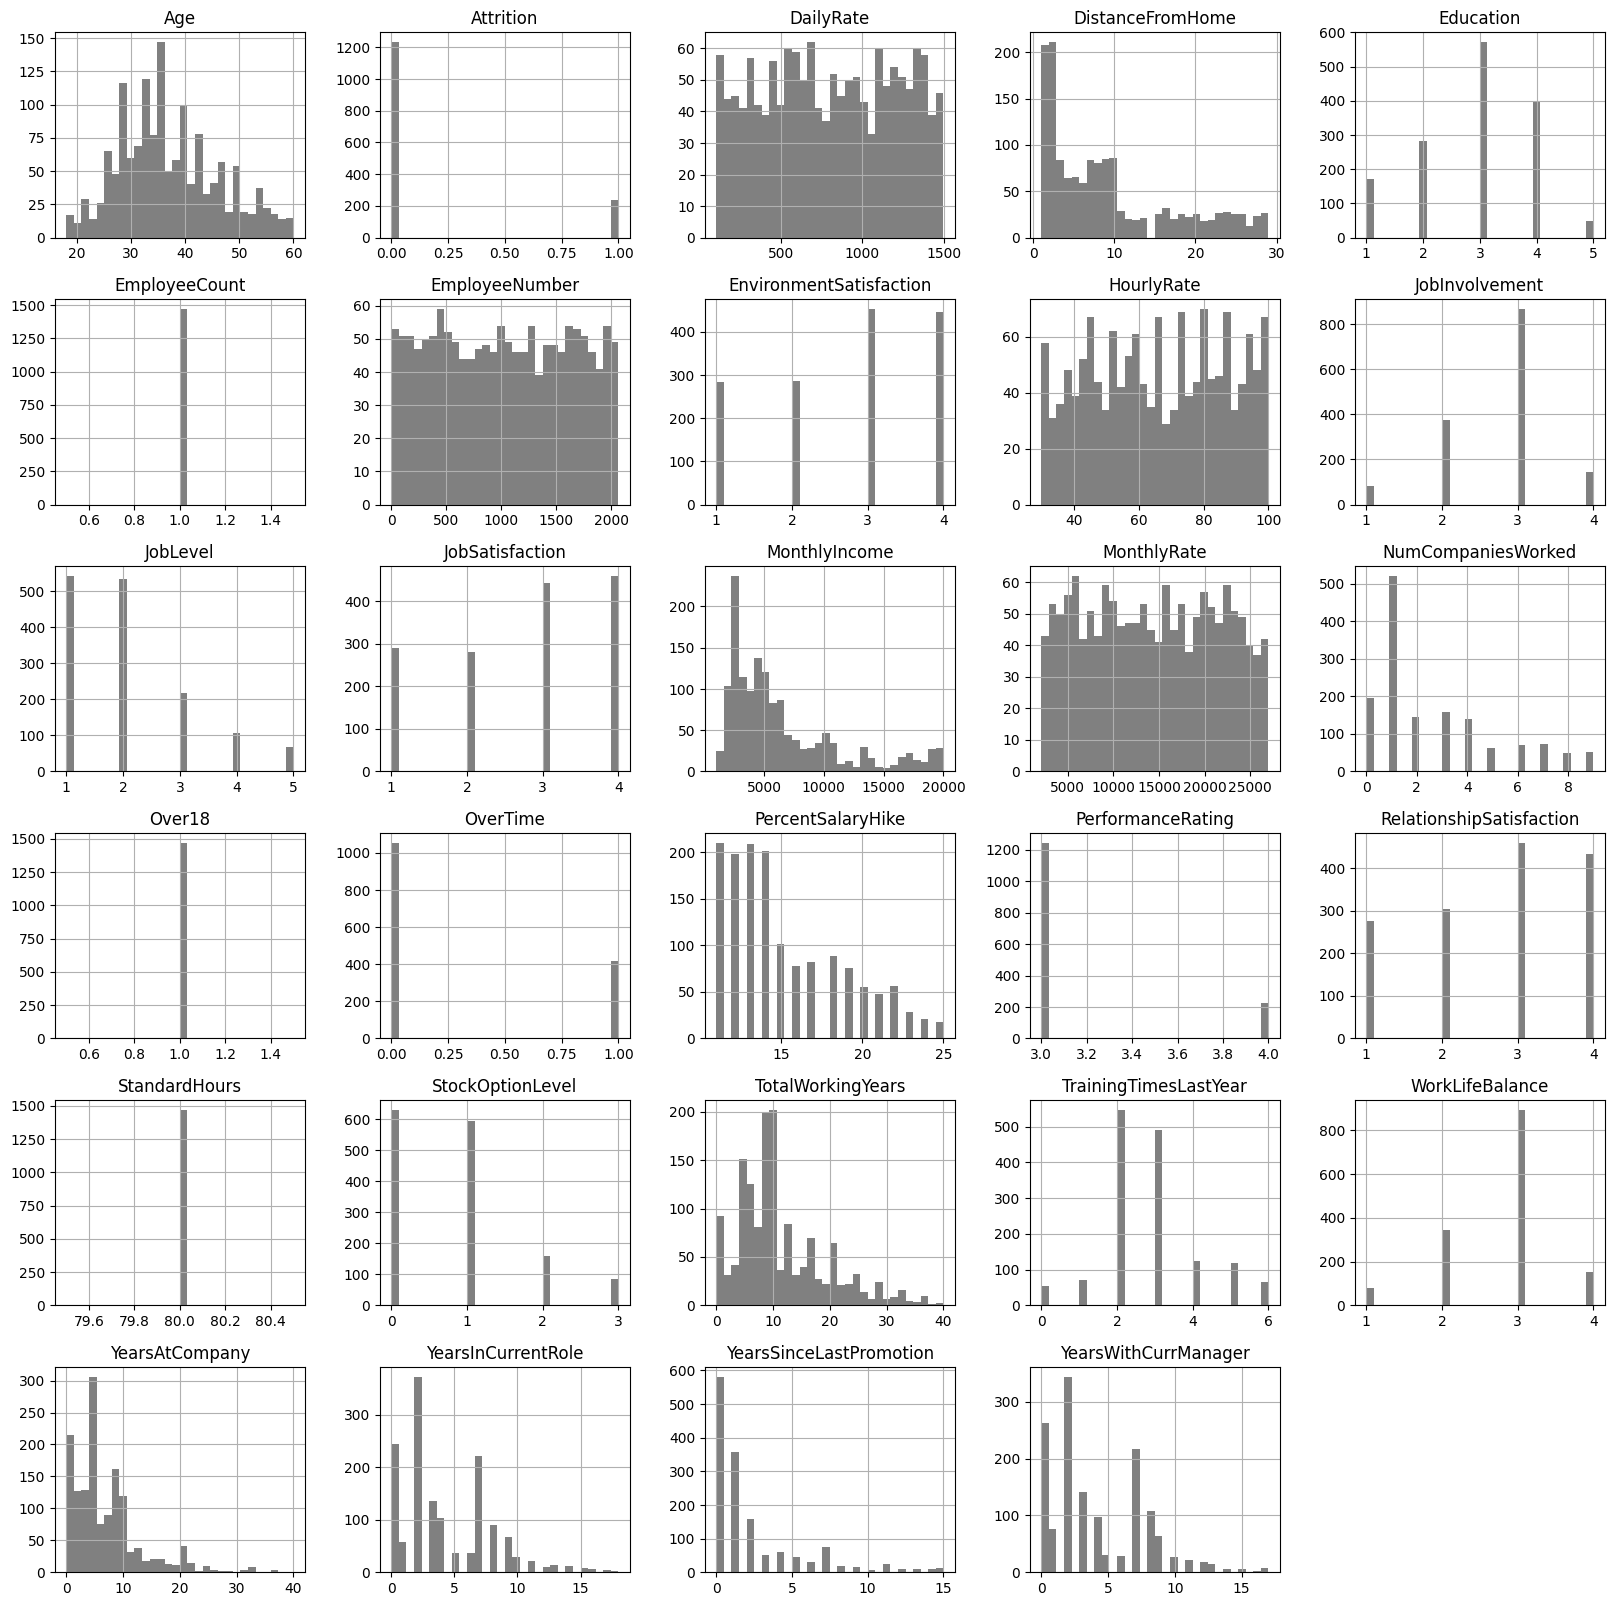

In [16]:
# Histogramas para variáveis numéricas:

employee_df.hist(bins=30, figsize=(20,20), color = 'gray');

In [17]:
# Com base nos histogramas, decidi eliminar os atributos com valores únicos.

employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)

In [18]:
employee_df.head(5), employee_df.shape

(   Age  Attrition     BusinessTravel  DailyRate              Department  \
 0   41          1      Travel_Rarely       1102                   Sales   
 1   49          0  Travel_Frequently        279  Research & Development   
 2   37          1      Travel_Rarely       1373  Research & Development   
 3   33          0  Travel_Frequently       1392  Research & Development   
 4   27          0      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
 0                 1          2  Life Sciences                        2   
 1                 8          1  Life Sciences                        3   
 2                 2          2          Other                        4   
 3                 3          4  Life Sciences                        4   
 4                 2          1        Medical                        1   
 
    Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
 0  Fema

In [19]:
# Contagem de funcionários que saíram e ficaram na empresa:

left_df = employee_df[employee_df['Attrition' ] == 1]
stayed_df = employee_df[employee_df['Attrition' ] == 0]

In [20]:
print('Total = ', len(employee_df),'\n')
print('Número de funcionários que saíram da empresa = ', len(left_df),'\n')
print('Porcentagem de funcionários que saíram da empresa = ', (len(left_df) / len(employee_df)) * 100,'\n')
print('Número de funcionários que ficaram na empresa = ', len(stayed_df),'\n')
print('Porcentagem de funcionários que ficaram na empresa = ', (len(stayed_df) / len(employee_df)) * 100,'\n')

Total =  1470 

Número de funcionários que saíram da empresa =  237 

Porcentagem de funcionários que saíram da empresa =  16.122448979591837 

Número de funcionários que ficaram na empresa =  1233 

Porcentagem de funcionários que ficaram na empresa =  83.87755102040816 



In [21]:
left_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
Attrition,237.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
DailyRate,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0
JobSatisfaction,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0


In [22]:
stayed_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1233.0,37.561233,8.888360,18.0,31.0,36.0,43.0,60.0
Attrition,1233.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
DailyRate,1233.0,812.504461,403.208379,102.0,477.0,817.0,1176.0,1499.0
DistanceFromHome,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Education,1233.0,2.927007,1.027002,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1233.0,2.771290,1.071132,1.0,2.0,3.0,4.0,4.0
HourlyRate,1233.0,65.952149,20.380754,30.0,48.0,66.0,83.0,100.0
JobInvolvement,1233.0,2.770479,0.692050,1.0,2.0,3.0,3.0,4.0
JobLevel,1233.0,2.145985,1.117933,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1233.0,2.778589,1.093277,1.0,2.0,3.0,4.0,4.0


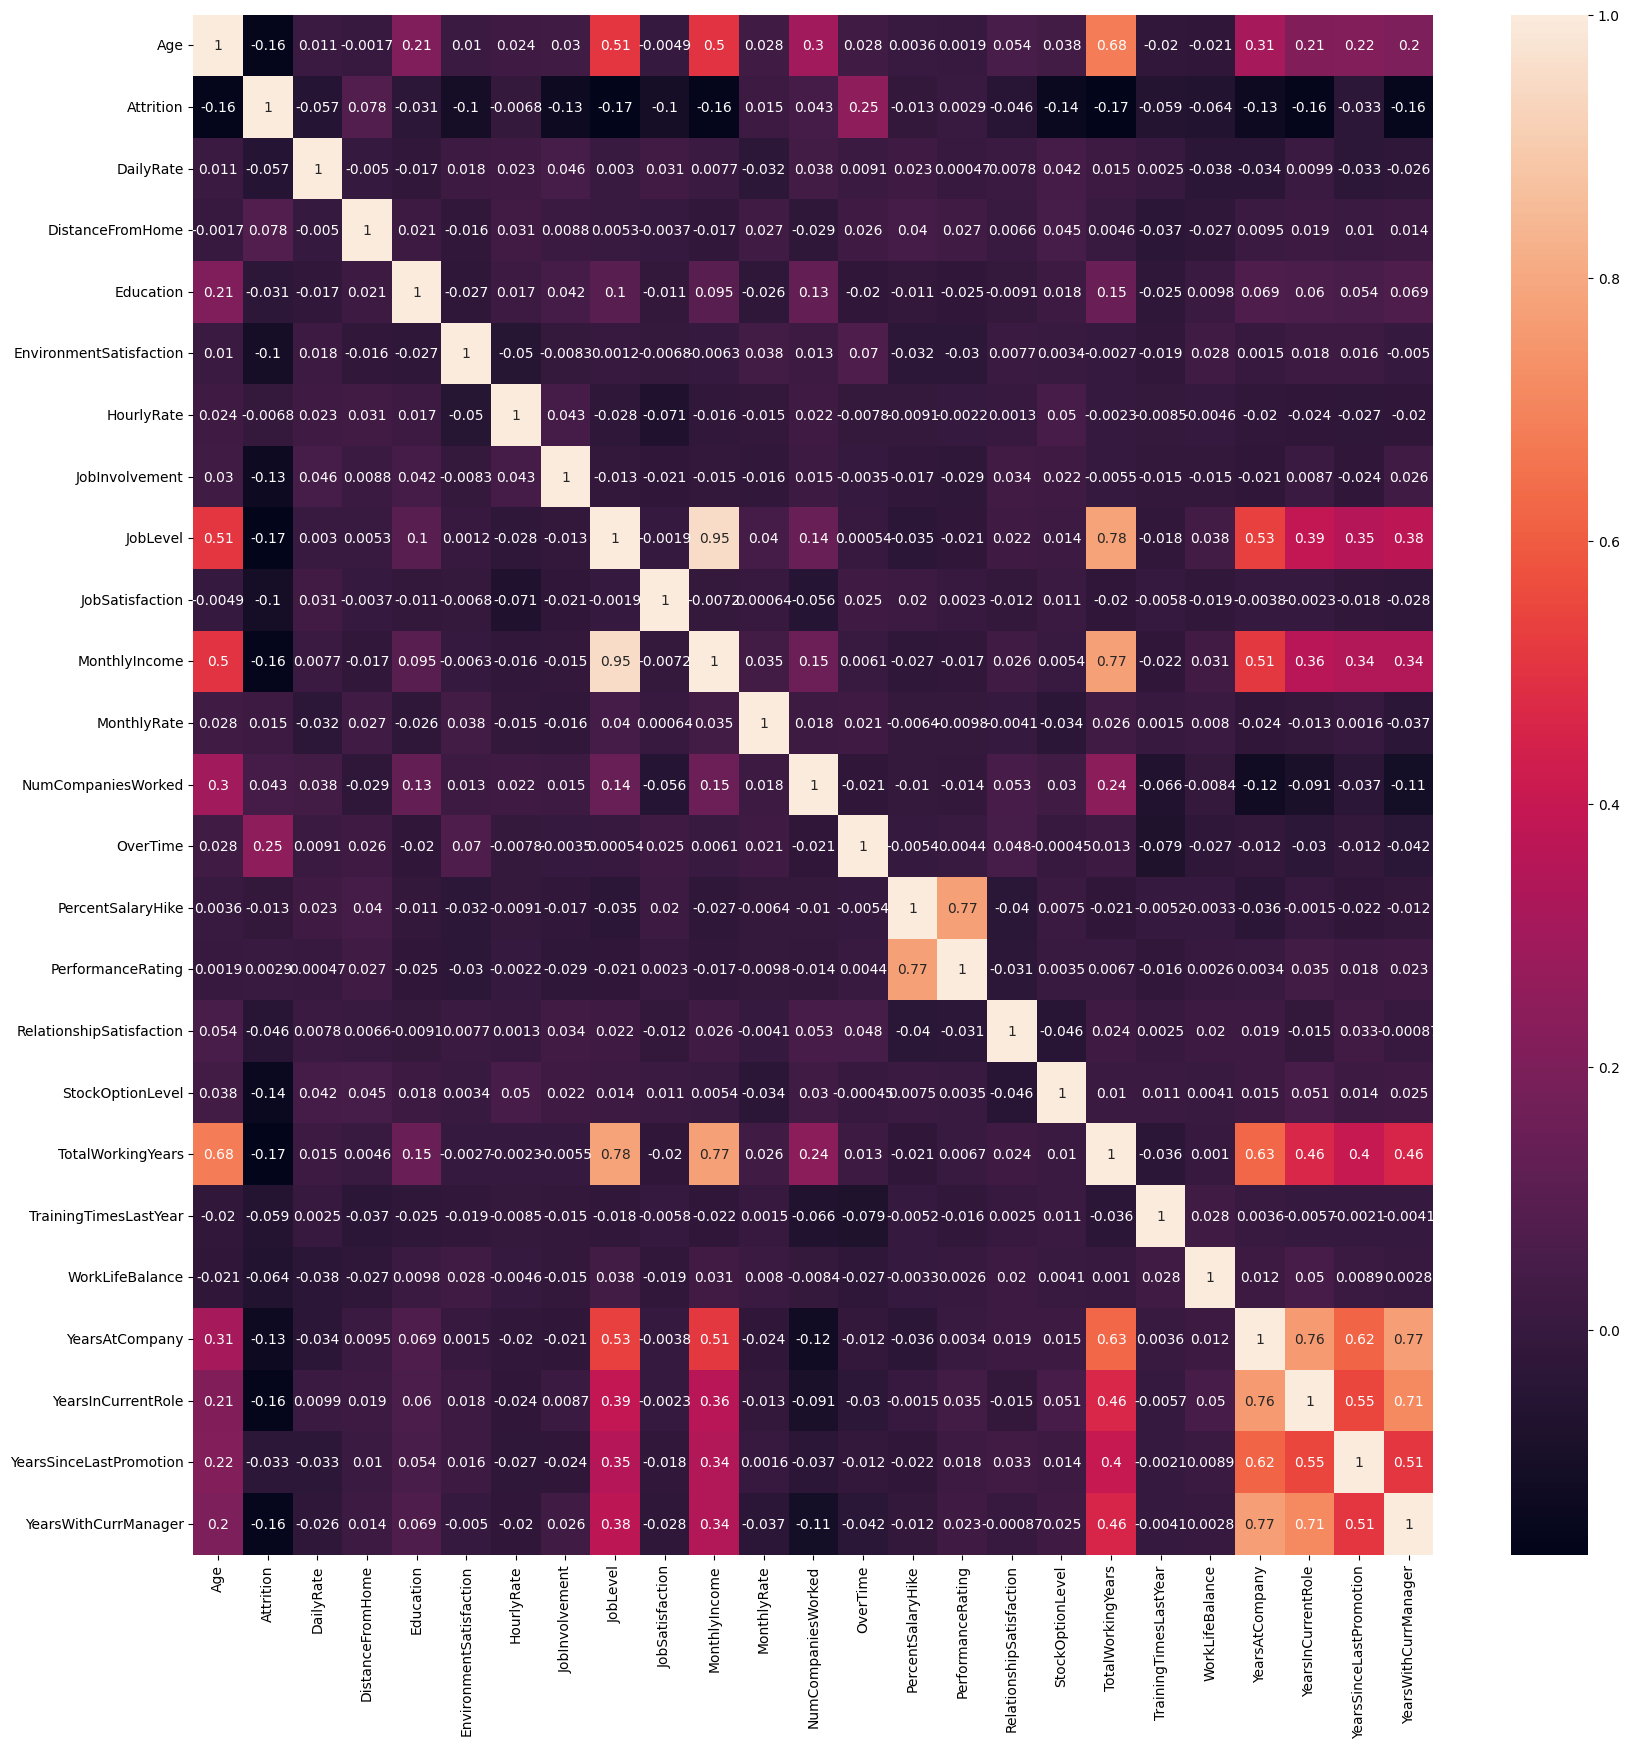

In [23]:
# Matriz de correlação entre variáveis:

correlations = employee_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

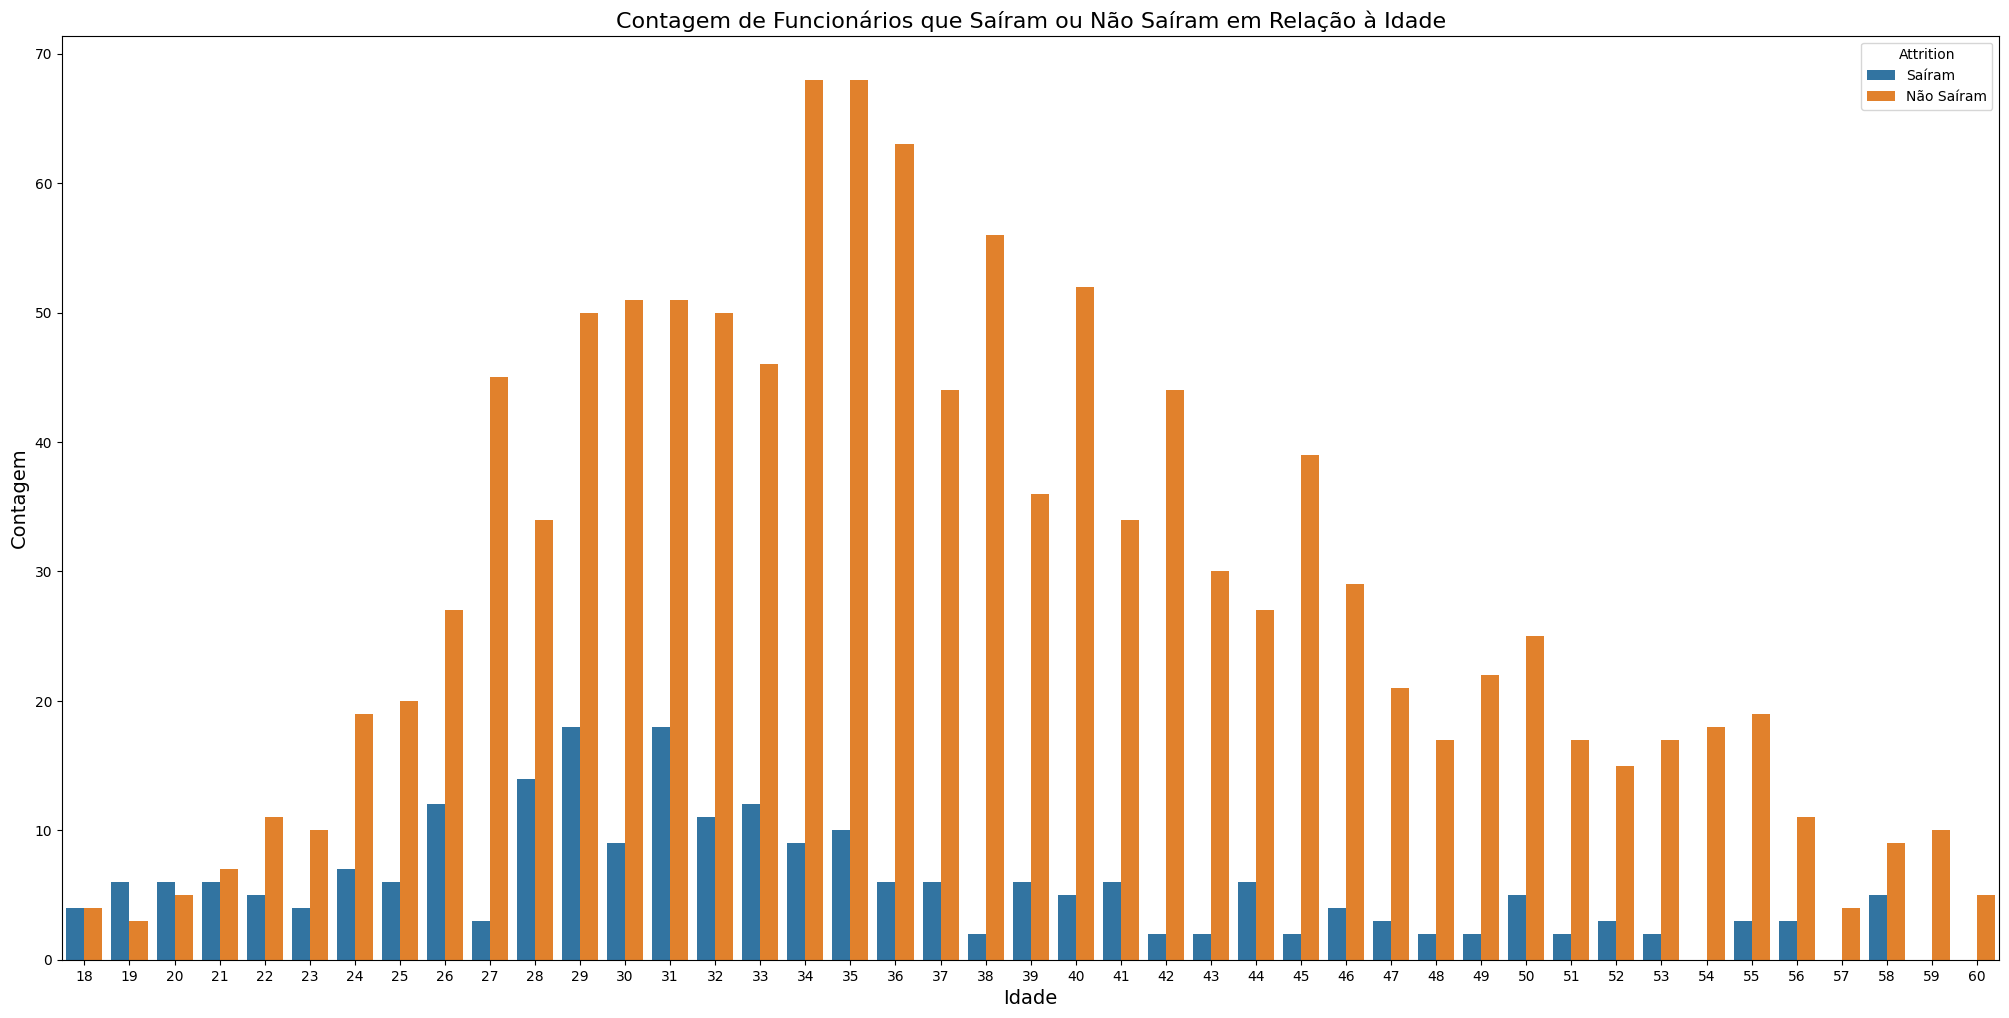

In [24]:
plt.figure(figsize=(25,12))
plt.title('Contagem de Funcionários que Saíram ou Não Saíram em Relação à Idade', fontsize=16)  # Título
sns.countplot(x='Age', hue=employee_df['Attrition'].map({0: 'Não Saíram', 1: 'Saíram'}), data=employee_df)  # Mapear os valores do Attrition
plt.xlabel('Idade', fontsize=14);  # Rótulo para o eixo x
plt.ylabel('Contagem', fontsize=14);  # Rótulo para o eixo y


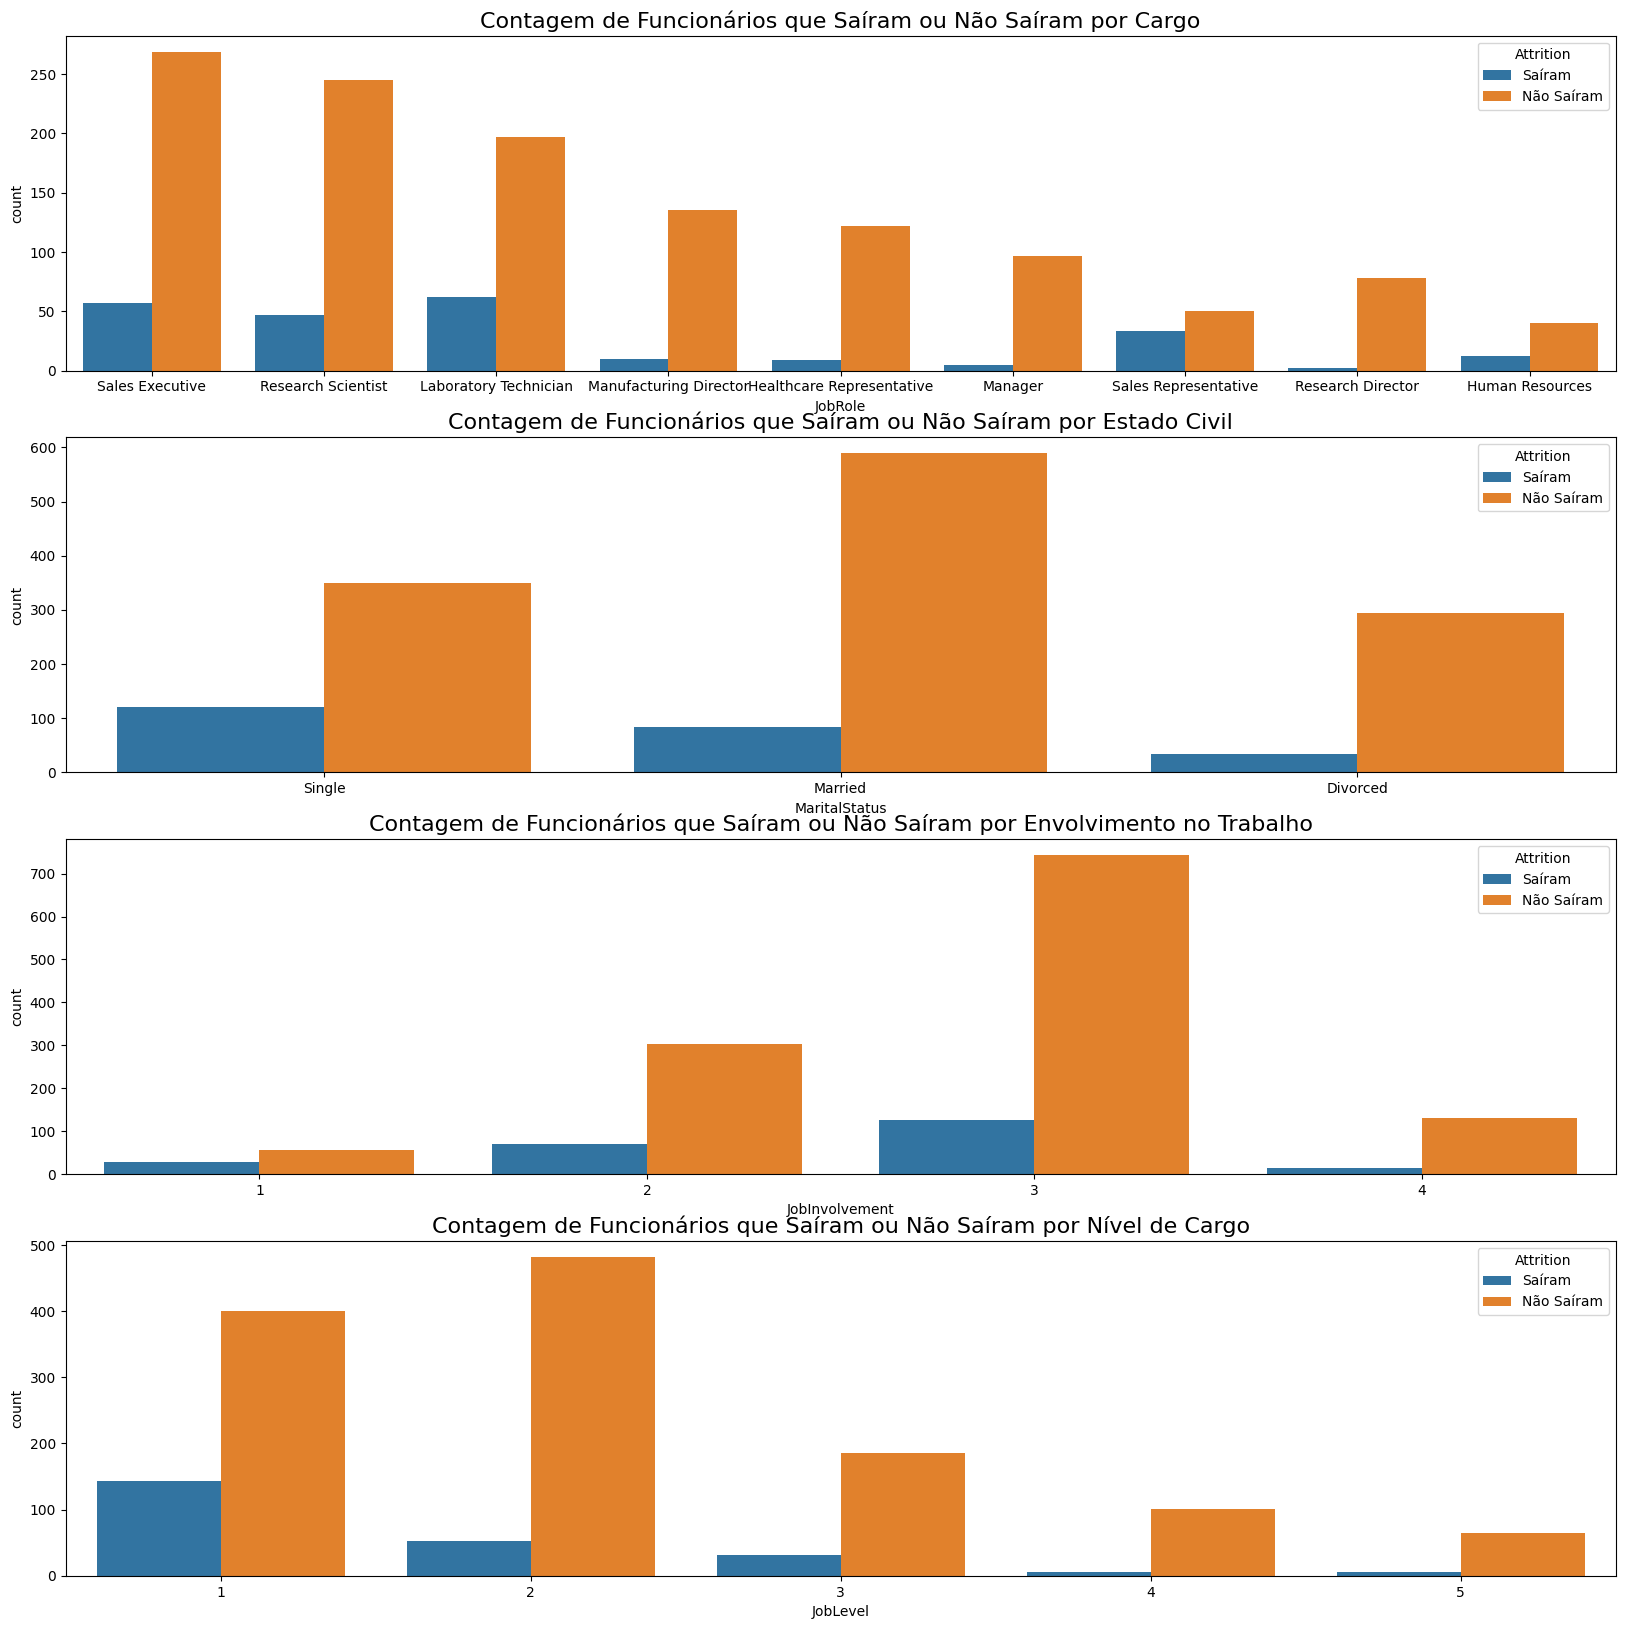

In [25]:
plt.figure(figsize=(20,20))

# Gráfico 1
plt.subplot(411)
plt.title('Contagem de Funcionários que Saíram ou Não Saíram por Cargo', fontsize=16)
sns.countplot(x='JobRole', hue=employee_df['Attrition'].map({0: 'Não Saíram', 1: 'Saíram'}), data=employee_df);

# Gráfico 2
plt.subplot(412)
plt.title('Contagem de Funcionários que Saíram ou Não Saíram por Estado Civil', fontsize=16)
sns.countplot(x='MaritalStatus', hue=employee_df['Attrition'].map({0: 'Não Saíram', 1: 'Saíram'}), data=employee_df);

# Gráfico 3
plt.subplot(413)
plt.title('Contagem de Funcionários que Saíram ou Não Saíram por Envolvimento no Trabalho', fontsize=16)
sns.countplot(x='JobInvolvement', hue=employee_df['Attrition'].map({0: 'Não Saíram', 1: 'Saíram'}), data=employee_df);

# Gráfico 4
plt.subplot(414)
plt.title('Contagem de Funcionários que Saíram ou Não Saíram por Nível de Cargo', fontsize=16)
sns.countplot(x='JobLevel', hue=employee_df['Attrition'].map({0: 'Não Saíram', 1: 'Saíram'}), data=employee_df);


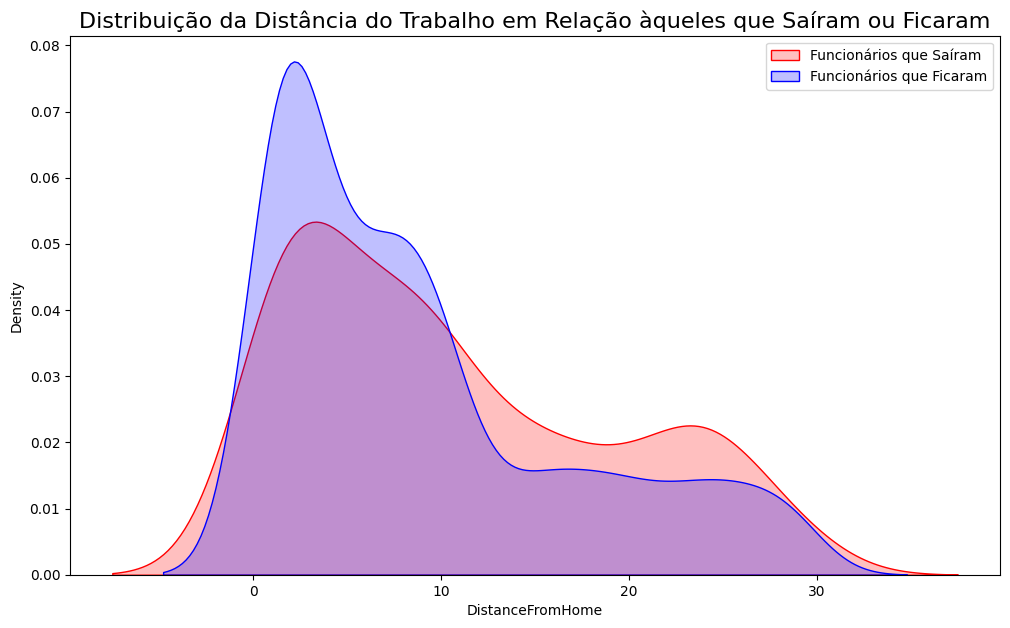

In [26]:
plt.figure(figsize=(12,7))
plt.title('Distribuição da Distância do Trabalho em Relação àqueles que Saíram ou Ficaram', fontsize=16)
sns.kdeplot(left_df['DistanceFromHome'], label='Funcionários que Saíram', fill=True, color='r');
sns.kdeplot(stayed_df['DistanceFromHome'], label='Funcionários que Ficaram', fill=True, color='b');
plt.legend();

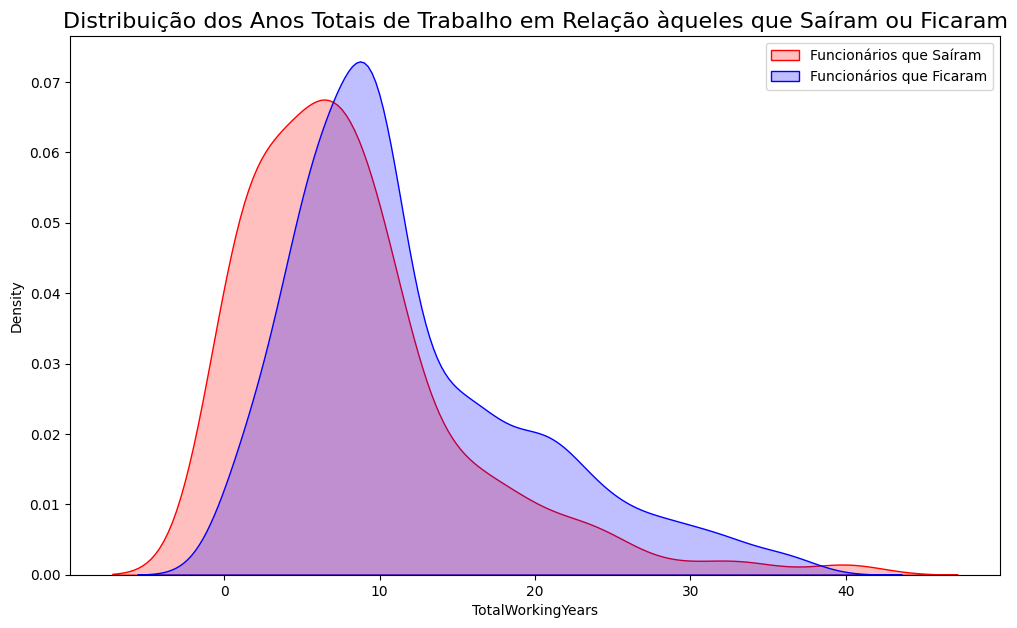

In [27]:
plt.figure(figsize=(12,7))
plt.title('Distribuição dos Anos Totais de Trabalho em Relação àqueles que Saíram ou Ficaram', fontsize=16)  # Título
sns.kdeplot(left_df['TotalWorkingYears'], label='Funcionários que Saíram', fill=True, color='r');
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Funcionários que Ficaram', fill=True, color='b');
plt.legend();

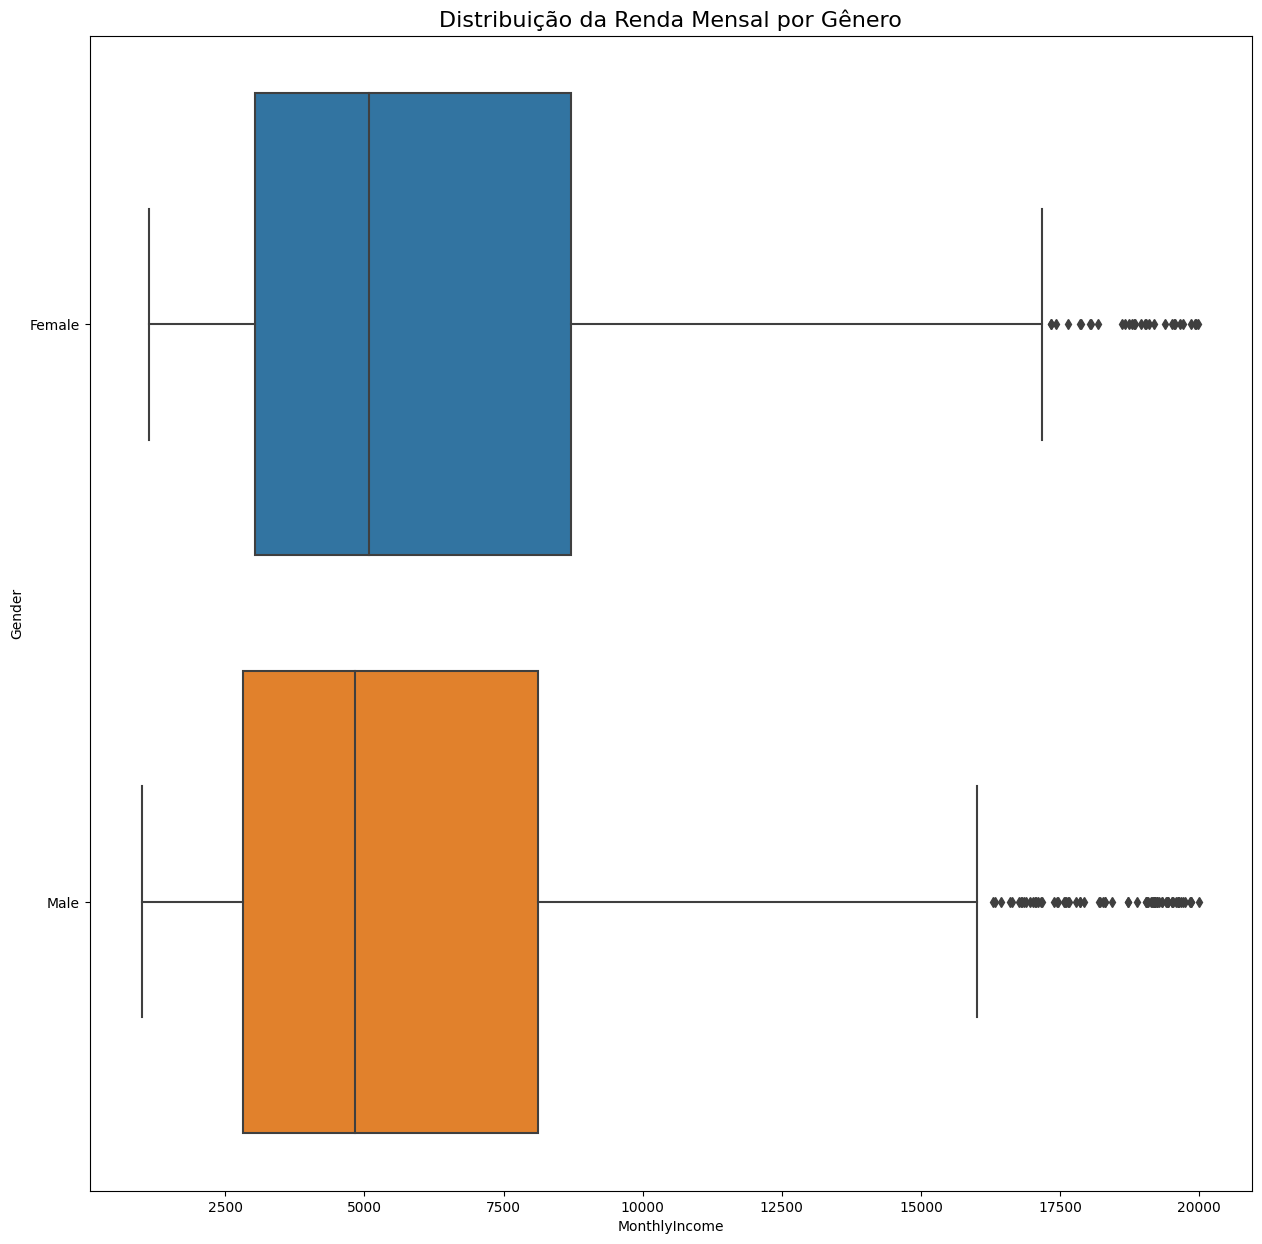

In [28]:
# Boxplot do salário mensal em relação ao gênero:

plt.figure(figsize=(15,15))
plt.title('Distribuição da Renda Mensal por Gênero', fontsize=16)
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df);


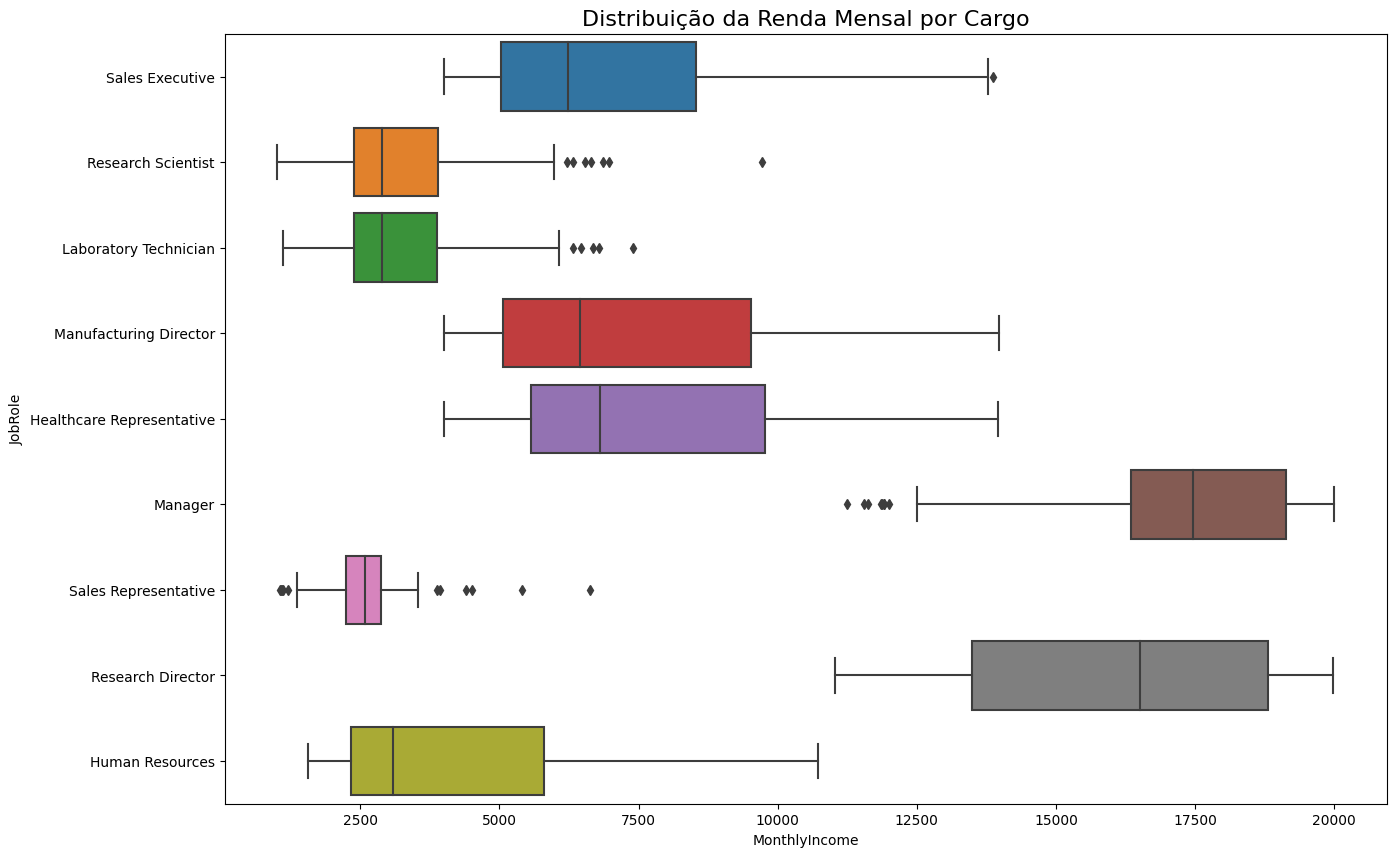

In [29]:
# Boxplot do salário mensal em relação ao cargo:

plt.figure(figsize=(15,10))
plt.title('Distribuição da Renda Mensal por Cargo', fontsize=16)
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df);

## Pré-processamento e bases de treinamento/teste

**Pré-processamento dos Dados**


Os dados foram pré-processados para serem adequados ao treinamento do modelo. Isso incluiu a criação de variáveis dummy para as características categóricas e a normalização das características numéricas.

In [30]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [31]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [32]:
X_cat.shape

(1470, 26)

In [33]:
X_cat = pd.DataFrame(X_cat)

In [34]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
# Não passar a variável referente a classe a ser prevista, que neste caso é a Attrition

X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [36]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [37]:
# Normalização das variáveis

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all.values)

In [38]:
# Classe a ser prevista
y = employee_df['Attrition']

In [39]:
# Aplicação do oversampling - para balancear a classe minoritária em relação a majoritária
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

**Divisão dos Dados em Treinamento e Teste**


Os dados foram divididos em conjuntos de treinamento e teste para o treinamento e avaliação do modelo de machine learning.

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.25)

In [41]:
X_train.shape, y_train

((1849, 50),
 1071    0
 2302    1
 1583    1
 1962    1
 2274    1
        ..
 2194    1
 315     0
 1883    1
 2132    1
 1730    1
 Name: Attrition, Length: 1849, dtype: int64)

In [42]:
X_test.shape, y_test.shape

((617, 50), (617,))

## Regressão logística

**Regressão Logística**


Um modelo de regressão logística foi treinado utilizando os dados de treinamento e avaliado utilizando os dados de teste. Foram calculadas métricas de desempenho, como acurácia, matriz de confusão, precisão, recall e pontuação F1.

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logistic = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

In [45]:
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [46]:
y_train_pred = logistic.predict(X_train)
y_train_pred

array([0, 1, 1, ..., 1, 1, 1])

In [47]:
y_test_pred = logistic.predict(X_test)
y_test_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[237,  63],
       [ 60, 257]])

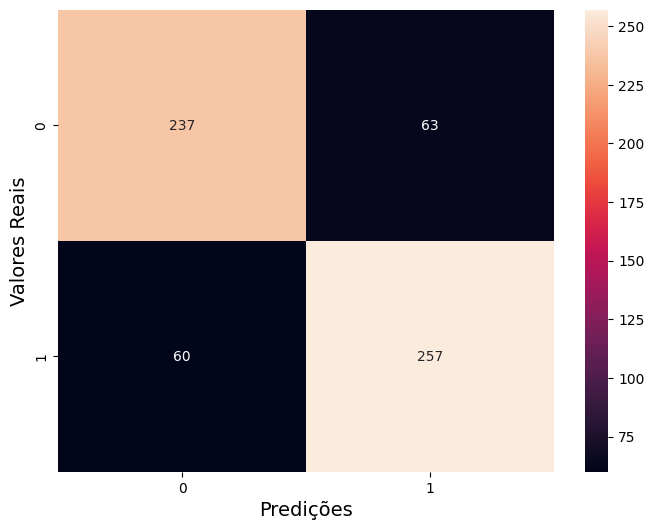

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')  # O argumento fmt='d' formata os números como inteiros
plt.xlabel('Predições', fontsize=14)
plt.ylabel('Valores Reais', fontsize=14)
plt.show()


In [51]:
f1_score(y_test, y_test_pred, average='macro')

0.8004386137910904

- Precision: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
- Recall: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
- F1: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [52]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       300
           1       0.80      0.81      0.81       317

    accuracy                           0.80       617
   macro avg       0.80      0.80      0.80       617
weighted avg       0.80      0.80      0.80       617



**Precision (Precisão):** Com um valor de precisão aproximada de 80% após a aplicação do oversampling, o modelo é capaz de identificar corretamente 80% dos funcionários que ele prevê como propensos a deixar a empresa. Isso representa um aumento siginificativo em relação ao modelo anterior (V1), onde a precisão estava em 69%.



**Recall (Recall ou Sensibilidade):** Com um recall de 81% após o oversampling, o modelo é capaz de identificar corretamente aproximadamente 81% dos funcionários que realmente deixarão a empresa. Esta métrica teve uma melhoria significativa em relação ao modelo anterior (V1) que era de apenas 37%, indicando que o modelo agora é mais sensível na detecção de casos de atrito real. Isso é essencial para garantir que o departamento de recursos humanos não perca funcionários que estão propensos a sair.



**F1 Score:** O F1 Score é a média harmônica entre precisão e recall. Com um valor aproximado de 81% após o oversampling, o modelo alcança um equilíbrio entre a precisão e a capacidade de detectar casos de atrito real. Esta métrica demonstra que o modelo ainda realiza uma classificação equilibrada e eficaz, considerando ambas as métricas.



Portanto, as métricas globais mostram um desempenho aprimorado com o oversampling, especialmente no que diz respeito ao recall. Isso indica que o modelo agora é mais sensível na identificação de funcionários propensos a deixar a empresa, o que é fundamental para a área de Recursos Humanos.

### Análise de Overfitting

In [56]:
# Métricas no conjunto de treinamento
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_score_train = f1_score(y_train, y_train_pred)

In [57]:
# Métricas no conjunto de teste
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_score_test = f1_score(y_test, y_test_pred)

In [58]:
print("Métricas no conjunto de treinamento:")
print(f"Acurácia: {accuracy_train}")
print(f"Precisão: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_score_train}")

Métricas no conjunto de treinamento:
Acurácia: 0.8053001622498648
Precisão: 0.7914046121593291
Recall: 0.824235807860262
F1 Score: 0.8074866310160427


In [59]:
print("\nMétricas no conjunto de teste:")
print(f"Acurácia: {accuracy_test}")
print(f"Precisão: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_score_test}")


Métricas no conjunto de teste:
Acurácia: 0.8006482982171799
Precisão: 0.803125
Recall: 0.8107255520504731
F1 Score: 0.8069073783359497


Os resultados das métricas no conjunto de treinamento e teste indicam que o modelo de regressão logística não está sofrendo de overfitting grave. Vamos analisar as métricas especificamente:


Conjunto de Treinamento:

Acurácia: 0.8053
Precisão: 0.7914
Recall: 0.8242
F1 Score: 0.8074


Conjunto de Teste:

Acurácia: 0.8006
Precisão: 0.8031
Recall: 0.8107
F1 Score: 0.8069


Observações:

A diferença entre as métricas no conjunto de treinamento e teste não é muito significativa. Isso é um bom sinal, pois indica que o modelo está generalizando bem para novos dados.

As métricas no conjunto de teste são um pouco mais baixas do que as métricas no conjunto de treinamento, o que é esperado. No entanto, as diferenças não são extremamente grandes, sugerindo que o modelo não está fazendo overfitting agressivo.

O F1 Score no conjunto de teste é uma métrica útil a ser observada, pois leva em consideração tanto a precisão quanto o recall. Um valor de F1 Score de 0.8074 é razoavelmente bom e sugere que o modelo está equilibrando bem a precisão e a capacidade de identificar casos positivos.

O recall (0.8107) no conjunto de teste é especialmente importante, pois mede a capacidade do modelo de identificar corretamente os casos positivos (funcionários propensos a deixar a empresa). Um recall de 0.8107 indica que o modelo está capturando a maioria dos casos positivos.

Em resumo, com base nas métricas fornecidas, não parece haver evidências claras de overfitting no modelo de regressão logística. O modelo está conseguindo generalizar bem para os dados de teste, e as diferenças nas métricas entre os conjuntos de treinamento e teste são razoáveis.

In [60]:
from sklearn.model_selection import learning_curve, cross_val_score

In [61]:
# Função para plotar curva de aprendizagem dos modelos

def plot_learning_curve(model, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(12, 8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Teste")

    plt.title("Curva de Aprendizagem")
    plt.xlabel("Tamanho do Conjunto de Treinamento")
    plt.ylabel("Acurácia")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [62]:
# Função para realizar validação cruzada

def perform_cross_validation(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Validação Cruzada - Acurácia Média: {scores.mean():.2f}")
    print(f"Validação Cruzada - Desvio Padrão: {scores.std():.2f}")

In [63]:
# Realizar validação cruzada para o modelo
perform_cross_validation(logistic, X_resampled, y_resampled, cv=5)  # Regressão Logística

Validação Cruzada - Acurácia Média: 0.80
Validação Cruzada - Desvio Padrão: 0.01


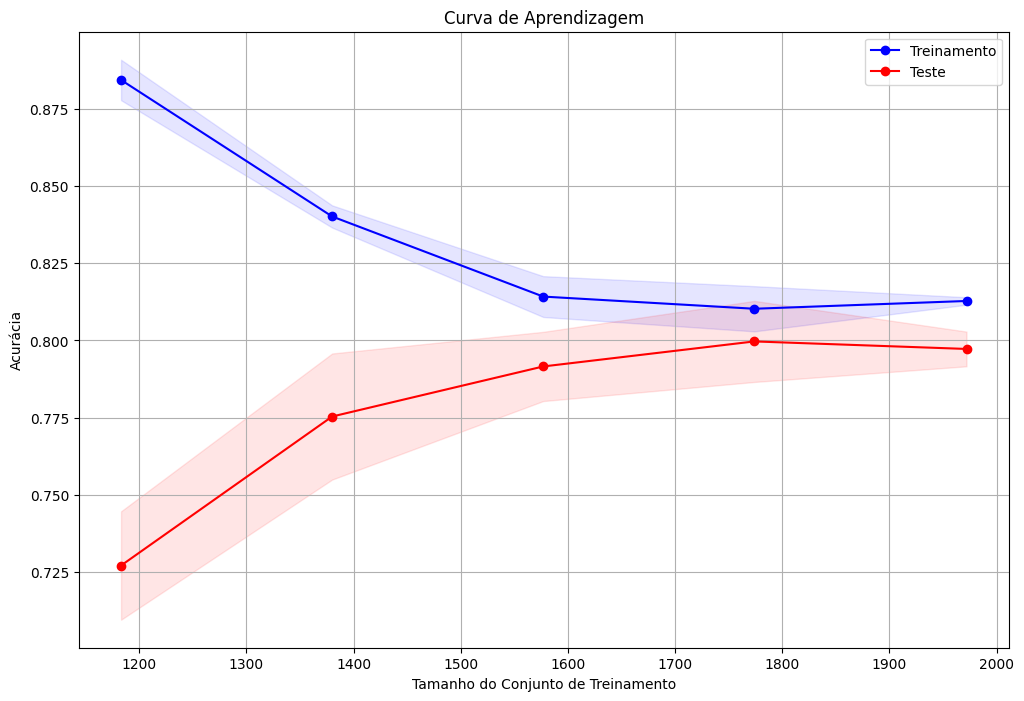

In [64]:
# Plotar curvas de aprendizagem para os modelos
plot_learning_curve(logistic, X_resampled, y_resampled, cv=5)  # Regressão Logística

A curva de aprendizado ajuda a visualizar como o desempenho do modelo varia à medida que o tamanho do conjunto de treinamento aumenta. Ela é útil para identificar possíveis problemas de overfitting (quando o desempenho no treinamento é muito melhor do que no teste) ou underfitting (quando o desempenho em ambos os conjuntos é baixo).

Neste caso, observamos o seguinte com base nas métricas fornecidas:

Conjunto de Treinamento: A acurácia, precisão, recall e F1 Score no conjunto de treinamento são relativamente altos, o que sugere que o modelo se ajustou bem aos dados de treinamento. No entanto, o desempenho no treinamento não está em um nível tão alto a ponto de indicar overfitting grave.

Conjunto de Teste: As métricas no conjunto de teste são um pouco mais baixas do que as métricas no conjunto de treinamento, o que é esperado. No entanto, as diferenças não são extremamente grandes, o que sugere que o modelo está generalizando bem para os dados de teste. Isso é um bom sinal, pois indica que o modelo não está fazendo overfitting agressivo.

Acurácia vs. Tamanho do Conjunto de Treinamento: A curva de aprendizado mostrará como a acurácia varia à medida que o tamanho do conjunto de treinamento aumenta. Se a curva de treinamento se aproximar da curva de teste e ambas se estabilizarem em um valor razoavelmente alto, isso indicará um modelo que está generalizando bem.

No geral, com base nas métricas fornecidas, não parece haver evidências claras de overfitting no modelo de regressão logística. O modelo está conseguindo generalizar bem para os dados de teste, e as diferenças nas métricas entre os conjuntos de treinamento e teste são razoáveis.

## Random forest

**Random Forest**


Um modelo de Random Forest foi treinado utilizando os dados de treinamento e avaliado utilizando os dados de teste. Foram calculadas métricas de desempenho semelhantes às da Regressão Logística.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Previsões no conjunto de treinamento e teste
y_train_pred_rf = forest.predict(X_train)
y_test_pred_rf = forest.predict(X_test)

In [ ]:
# Métricas de Desempenho de Teste

accuracy_score(y_test, y_test_pred_rf)

0.9594813614262561

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_rf)
cm

array([[303,   5],
       [ 20, 289]])

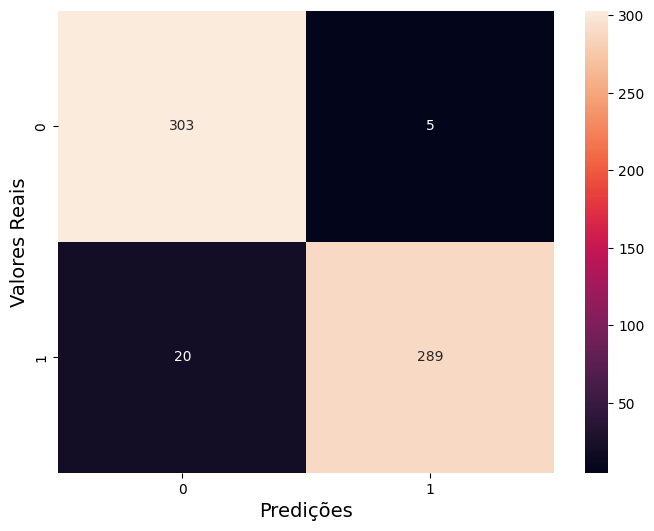

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')  # O argumento fmt='d' formata os números como inteiros
plt.xlabel('Predições', fontsize=14)
plt.ylabel('Valores Reais', fontsize=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       308
           1       0.98      0.94      0.96       309

    accuracy                           0.96       617
   macro avg       0.96      0.96      0.96       617
weighted avg       0.96      0.96      0.96       617



**Precision (Precisão):** Com um impressionante valor de precisão de 94% para a classe 0 (Não saíram) e 98% para a classe 1 (Saíram) após a aplicação do oversampling, o modelo Random Forest demonstra uma habilidade excepcional em identificar corretamente os funcionários propensos a deixar a empresa. Isso significa que quando o modelo faz uma previsão de atrito, ele está correto em 94% das vezes para a classe 0 e 98% das vezes para a classe 1. Essa alta precisão é crucial para evitar falsos positivos e garantir que as ações do Departamento de Recursos Humanos sejam direcionadas de forma eficaz.

**Recall (Recall ou Sensibilidade):** Com um recall de 98% para a classe 0 (Não saíram) e 94% para a classe 1 (Saíram) após o oversampling, o modelo Random Forest também demonstra excelente capacidade em identificar corretamente os funcionários que realmente deixarão a empresa. Essa métrica destaca que o modelo é altamente sensível na detecção de casos de atrito real, minimizando a perda de funcionários propensos a sair.

**F1 Score:** O F1 Score, que combina precisão e recall, apresenta um valor notável de 96% para ambas as classes após o oversampling. Isso indica que o modelo Random Forest alcança um equilíbrio impressionante entre a precisão e a capacidade de identificar casos de atrito real, tornando-o altamente eficaz em sua classificação.

**Acurácia (Accuracy):** A acurácia global do modelo atinge um valor excelente de 96%, demonstrando que o Random Forest é altamente confiável em suas previsões para ambas as classes. Esta métrica reflete a capacidade do modelo de realizar classificações precisas.

Em resumo, o modelo Random Forest com oversampling apresenta um desempenho excepcional em todas as métricas de avaliação. Sua alta precisão, recall e F1 Score indicam que ele é altamente eficaz na identificação de funcionários propensos a deixar a empresa, reduzindo tanto falsos positivos quanto falsos negativos. Isso é fundamental para auxiliar o Departamento de Recursos Humanos em suas estratégias de retenção de talentos.

### Análise de Overfitting

In [ ]:
# Métricas no conjunto de treinamento
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
precision_train_rf = precision_score(y_train, y_train_pred_rf)
recall_train_rf = recall_score(y_train, y_train_pred_rf)
f1_score_train_rf = f1_score(y_train, y_train_pred_rf)

In [ ]:
# Métricas no conjunto de teste
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf)
recall_test_rf = recall_score(y_test, y_test_pred_rf)
f1_score_test_rf = f1_score(y_test, y_test_pred_rf)

In [ ]:
print("Métricas no conjunto de treinamento:")
print(f"Acurácia: {accuracy_train_rf}")
print(f"Precisão: {precision_train_rf}")
print(f"Recall: {recall_train_rf}")
print(f"F1 Score: {f1_score_train_rf}")

Métricas no conjunto de treinamento:
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
print("\nMétricas no conjunto de teste:")
print(f"Acurácia: {accuracy_test_rf}")
print(f"Precisão: {precision_test_rf}")
print(f"Recall: {recall_test_rf}")
print(f"F1 Score: {f1_score_test_rf}")


Métricas no conjunto de teste:
Acurácia: 0.9594813614262561
Precisão: 0.9829931972789115
Recall: 0.9352750809061489
F1 Score: 0.9585406301824212


In [ ]:
# Realizar validação cruzada para o modelo
perform_cross_validation(forest, X_resampled, y_resampled, cv=5)    # Random Forest

Validação Cruzada - Acurácia Média: 0.93
Validação Cruzada - Desvio Padrão: 0.09


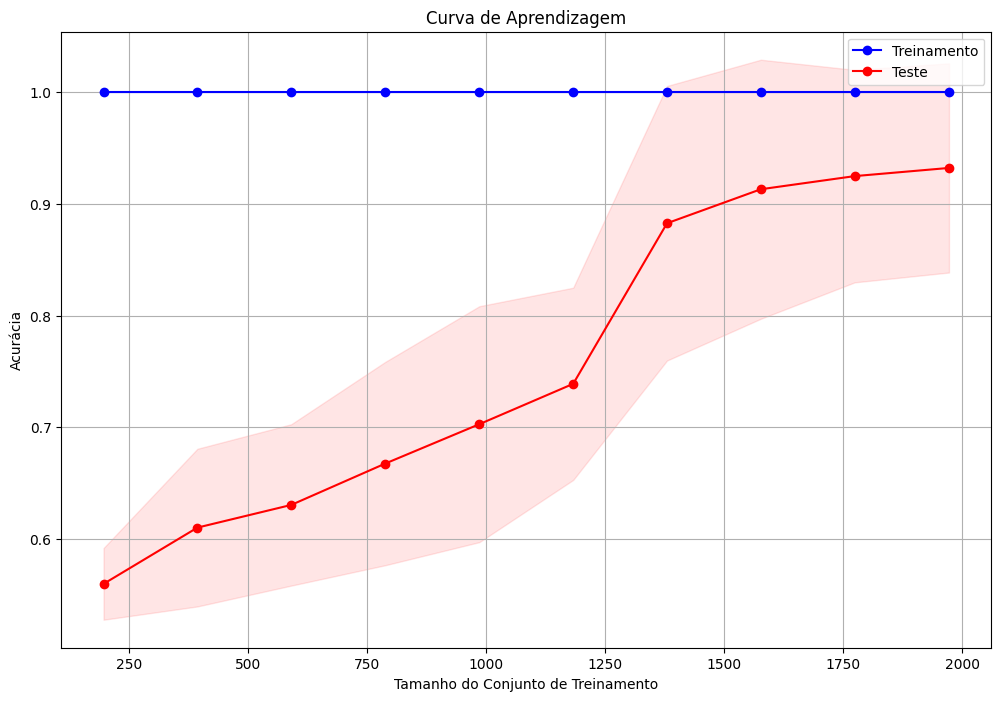

In [ ]:
# Plotar curva de aprendizado para o modelo Random Forest
plot_learning_curve(forest, X_resampled, y_resampled, cv=5)

As métricas no conjunto de teste são muito boas e indicam um modelo de Random Forest com um desempenho geral forte. No entanto, vale a pena notar que, embora as métricas no conjunto de teste sejam excelentes, elas são ligeiramente mais baixas do que as métricas no conjunto de treinamento, o que é esperado. O modelo ainda está performando muito bem no conjunto de teste, mas não tão perfeitamente quanto no conjunto de treinamento.

**Curva de Aprendizado:**

A curva de aprendizado mostra que à medida que o tamanho do conjunto de treinamento aumenta, a acurácia no conjunto de treinamento permanece em 100%, enquanto a acurácia no conjunto de teste estabiliza em torno de 92%. Isso é um indicativo claro de overfitting, pois o modelo está superajustando-se aos dados de treinamento, mas não está generalizando tão bem para os dados de teste.
Em resumo, os resultados das métricas e da curva de aprendizado indicam que o modelo de Random Forest está sofrendo de overfitting. Ele se ajustou perfeitamente aos dados de treinamento, mas não está generalizando tão bem para novos dados (conjunto de teste).

### Buscando melhor combinação de hiperparâmetros

Como o modelo de Random Forest parece muito promissor e está sofrendo de overfitting, decidi buscar a melhor combinação de hiperparâmetos a fim de combater o overfitting.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Dicionário de hiperparâmetros que você para otimização
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de amostras em uma folha
}

In [ ]:
# Instância do modelo Random Forest
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Instância de GridSearchCV com o modelo e o dicionário de hiperparâmetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
# Ajuste do GridSearchCV aos dados de treinamento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Visualizando os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Obtendo o melhor modelo encontrado
best_model = grid_search.best_estimator_

In [ ]:
# Avalie o melhor modelo no conjunto de teste
accuracy = best_model.score(X_test, y_test)
print("Acurácia do melhor modelo no conjunto de teste:", accuracy)

Acurácia do melhor modelo no conjunto de teste: 0.9594813614262561


Novo modelo de Random Forest com a melhor combinação de hiperparâmetros

In [ ]:
best_rf_model = RandomForestClassifier(random_state=42, max_depth= 7, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500)

In [ ]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=500, random_state=42)

In [ ]:
# Previsões no conjunto de treinamento e teste
y_train_pred_rf = best_rf_model.predict(X_train)
y_test_pred_rf = best_rf_model.predict(X_test)

In [ ]:
# Métricas de Desempenho de Teste

accuracy_score(y_test, y_test_pred_rf)

0.940032414910859

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_rf)
cm

array([[294,  14],
       [ 23, 286]])

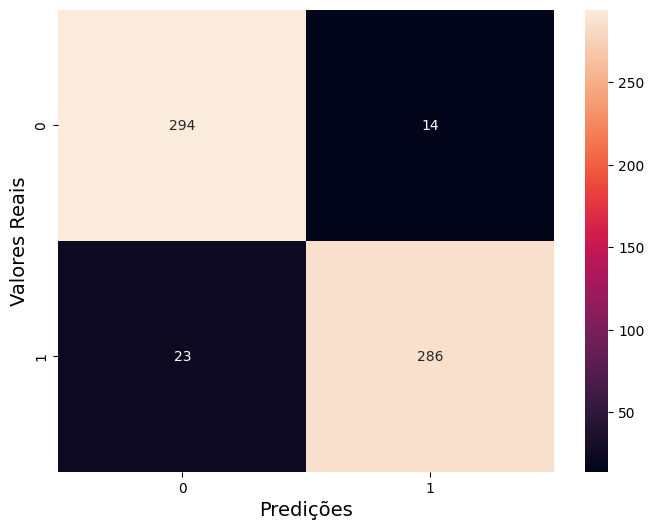

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')  # O argumento fmt='d' formata os números como inteiros
plt.xlabel('Predições', fontsize=14)
plt.ylabel('Valores Reais', fontsize=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       308
           1       0.95      0.93      0.94       309

    accuracy                           0.94       617
   macro avg       0.94      0.94      0.94       617
weighted avg       0.94      0.94      0.94       617



In [ ]:
# Métricas no conjunto de treinamento
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
precision_train_rf = precision_score(y_train, y_train_pred_rf)
recall_train_rf = recall_score(y_train, y_train_pred_rf)
f1_score_train_rf = f1_score(y_train, y_train_pred_rf)

In [ ]:
# Métricas no conjunto de teste
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf)
recall_test_rf = recall_score(y_test, y_test_pred_rf)
f1_score_test_rf = f1_score(y_test, y_test_pred_rf)

In [ ]:
print("Métricas no conjunto de treinamento:")
print(f"Acurácia: {accuracy_train_rf}")
print(f"Precisão: {precision_train_rf}")
print(f"Recall: {recall_train_rf}")
print(f"F1 Score: {f1_score_train_rf}")

Métricas no conjunto de treinamento:
Acurácia: 0.9697133585722012
Precisão: 0.984375
Recall: 0.9545454545454546
F1 Score: 0.9692307692307692


In [ ]:
print("\nMétricas no conjunto de teste:")
print(f"Acurácia: {accuracy_test_rf}")
print(f"Precisão: {precision_test_rf}")
print(f"Recall: {recall_test_rf}")
print(f"F1 Score: {f1_score_test_rf}")


Métricas no conjunto de teste:
Acurácia: 0.940032414910859
Precisão: 0.9533333333333334
Recall: 0.9255663430420712
F1 Score: 0.9392446633825944


In [ ]:
# Realizar validação cruzada para o modelo
perform_cross_validation(best_rf_model, X_resampled, y_resampled, cv=7)    # Best Random Forest

Validação Cruzada - Acurácia Média: 0.91
Validação Cruzada - Desvio Padrão: 0.07


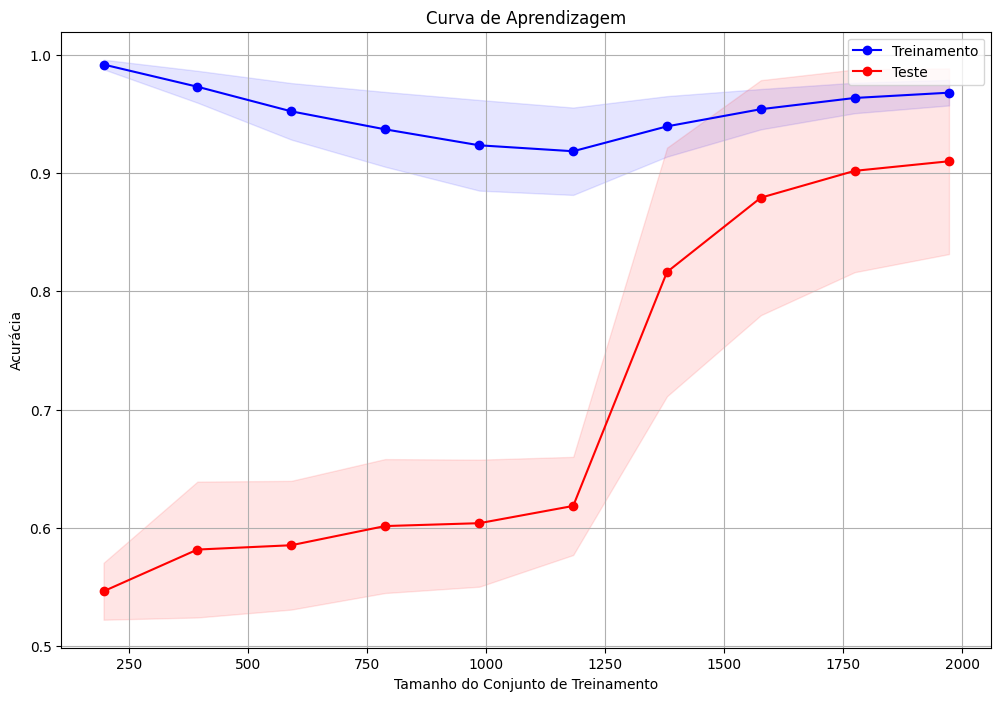

In [ ]:
# Plotar curva de aprendizado para o modelo Random Forest
plot_learning_curve(best_rf_model, X_resampled, y_resampled, cv=5)

Mesmo utilizando a melhor combinção de hiperparâmetros e fazendo algumas alterações manuais o modelo de Random Forest permanece com uma variabilidade alta na validação cruzada.

Vou tentar utilizar a técnica de Bagging no bloco abaixo, a fim de tentar diminuir a variabilidade.

### Bootstrap Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
# Instância do modelo Random Forest com os melhores hiperparâmetros encontrados
best_rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=300,  # Número de árvores na floresta
    max_depth= None,  # Profundidade máxima das árvores
    min_samples_split=2,  # Número mínimo de amostras para dividir um nó
    min_samples_leaf=1  # Número mínimo de amostras em uma folha
)

In [ ]:
# Instância do BaggingClassifier que utiliza o modelo Random Forest
bagging_model = BaggingClassifier(estimator=best_rf_model, n_estimators=10, random_state=42)

In [ ]:
# Treinando do modelo de Bagging nos dados de treinamento
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(n_estimators=300,
                                                   random_state=42),
                  random_state=42)

In [ ]:
# Previsões em um novo conjunto de dados
y_new_pred_bagging = bagging_model.predict(X_test)

In [ ]:
# Previsões no conjunto de treinamento e teste
y_train_new_pred_bagging = bagging_model.predict(X_train)
y_test_new_pred_bagging = bagging_model.predict(X_test)

In [ ]:
# Métricas de Desempenho de Teste

accuracy_score(y_test, y_test_new_pred_bagging)

0.9578606158833063

In [ ]:
cm = confusion_matrix(y_test, y_test_new_pred_bagging)
cm

array([[299,   9],
       [ 17, 292]])

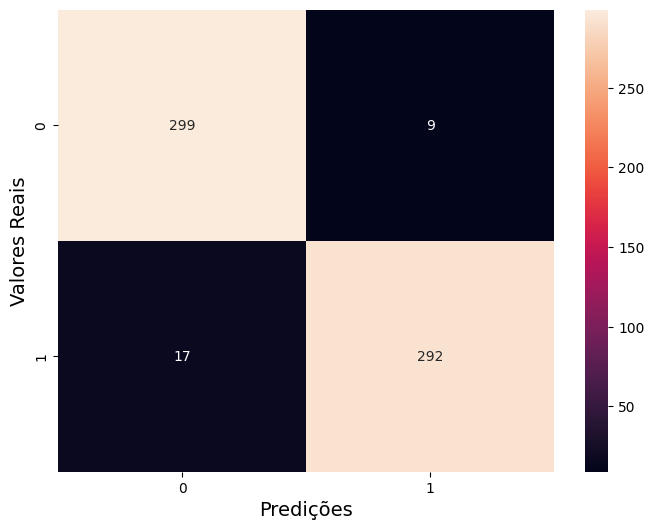

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')  # O argumento fmt='d' formata os números como inteiros
plt.xlabel('Predições', fontsize=14)
plt.ylabel('Valores Reais', fontsize=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_test_new_pred_bagging))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       308
           1       0.97      0.94      0.96       309

    accuracy                           0.96       617
   macro avg       0.96      0.96      0.96       617
weighted avg       0.96      0.96      0.96       617



In [ ]:
# Métricas no conjunto de treinamento
accuracy_train_rf = accuracy_score(y_train, y_train_new_pred_bagging)
precision_train_rf = precision_score(y_train, y_train_new_pred_bagging)
recall_train_rf = recall_score(y_train, y_train_new_pred_bagging)
f1_score_train_rf = f1_score(y_train, y_train_new_pred_bagging)

In [ ]:
# Métricas no conjunto de teste
accuracy_test_rf = accuracy_score(y_test, y_test_new_pred_bagging)
precision_test_rf = precision_score(y_test, y_test_new_pred_bagging)
recall_test_rf = recall_score(y_test, y_test_new_pred_bagging)
f1_score_test_rf = f1_score(y_test, y_test_new_pred_bagging)

In [ ]:
print("Métricas no conjunto de treinamento:")
print(f"Acurácia: {accuracy_train_rf}")
print(f"Precisão: {precision_train_rf}")
print(f"Recall: {recall_train_rf}")
print(f"F1 Score: {f1_score_train_rf}")

Métricas no conjunto de treinamento:
Acurácia: 0.9972958355868037
Precisão: 0.9967567567567568
Recall: 0.9978354978354979
F1 Score: 0.9972958355868037


In [ ]:
print("\nMétricas no conjunto de teste:")
print(f"Acurácia: {accuracy_test_rf}")
print(f"Precisão: {precision_test_rf}")
print(f"Recall: {recall_test_rf}")
print(f"F1 Score: {f1_score_test_rf}")


Métricas no conjunto de teste:
Acurácia: 0.9578606158833063
Precisão: 0.9700996677740864
Recall: 0.9449838187702265
F1 Score: 0.9573770491803278


In [ ]:
# Realizar validação cruzada para o modelo
perform_cross_validation(bagging_model, X_resampled, y_resampled, cv=5)    # Bagging Random Forest

Validação Cruzada - Acurácia Média: 0.93
Validação Cruzada - Desvio Padrão: 0.09


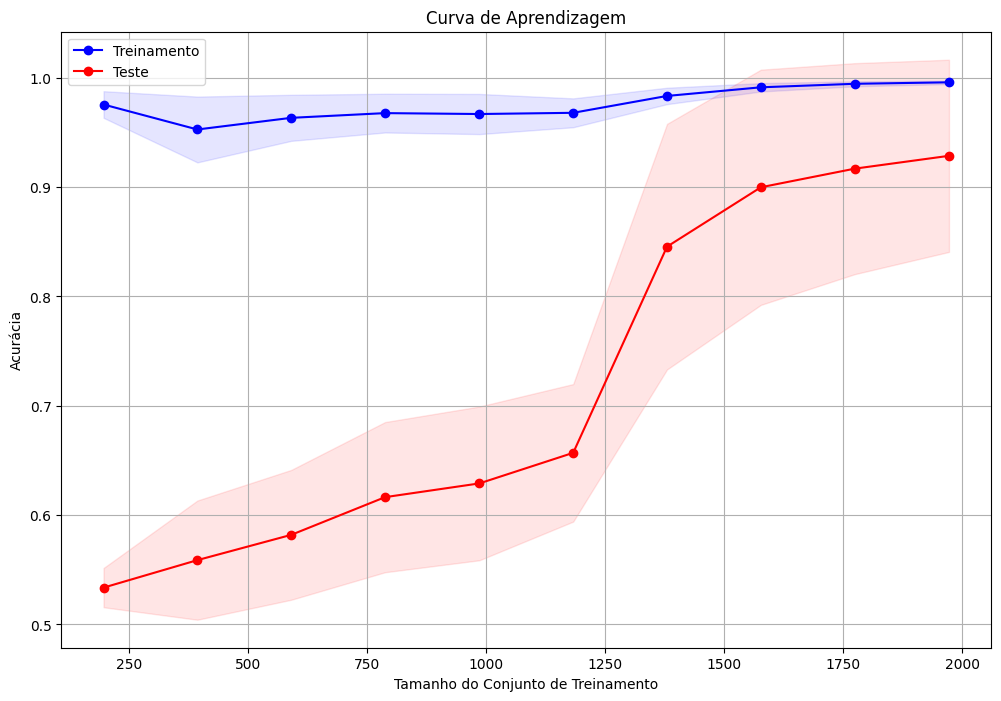

In [ ]:
# Plotar curva de aprendizado para o modelo Random Forest
plot_learning_curve(bagging_model, X_resampled, y_resampled, cv=5)

Mesmo aplicando a técnica de bootstrap bagging não consegui baixar a variabilidade na validação cruzada do modelo, pelo contrário, acabei aumentando a variabilidade.

**Conclusão sobre o Overfitting no modelo de Random Forest**

Com base nas métricas obtidas com a melhor combinação de hiperparâmetros, parece não haver sinais evidentes de overfitting no modelo de Random Forest.


**Vamos analisar as principais observações:**

Diferença entre Conjunto de Treinamento e Teste:

A diferença entre as métricas de treinamento e teste é relativamente pequena, o que indica que o modelo não está superajustando significativamente os dados de treinamento. A precisão, o recall e o F1 Score são consistentes entre os conjuntos de treinamento e teste.


Pontuações de Validação Cruzada:

A acurácia média na validação cruzada é de 0,91, o que é uma métrica sólida. Além disso, o desvio padrão de 0,07 indica que as pontuações de validação cruzada são relativamente consistentes em todas as dobras, sugerindo que o modelo está se comportando de maneira estável em diferentes partições dos dados.


Curva de Aprendizado:
O gráfico de aprendizado mostra que o desempenho do modelo no conjunto de treinamento e teste converge à medida que o tamanho do conjunto de treinamento aumenta. Isso também sugere que o modelo não está superajustando, pois não há uma grande lacuna entre as curvas de treinamento e teste.


Métricas em Conjunto de Teste Sólidas:
As métricas no conjunto de teste, como precisão, recall e F1 Score, são sólidas e indicam um desempenho robusto do modelo em dados não vistos.

No geral, com base nas métricas e nas análises acima, não parece haver presença clara de overfitting no modelo de Random Forest.

## Redes neurais artificiais

- Quantos neurônios e quantas camadas? https://iaexpert.academy/2020/05/04/quantas-camadas-escondidas-e-quantos-neuronios-incluir-numa-rede-neural-artificial/

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X_train.shape

(1849, 50)

In [ ]:
# Fórmula para definir quantidade de neurônios a serem utilizados na rede neural
# Número de entradas + número de saídas (uma probabilidade nesse cenário do RH)
(50 + 1) / 2

25.5

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [ ]:
# Treinando o modelo
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [ ]:
# Previsões no conjunto de treinamento e teste
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

In [ ]:
# Cálculo das métricas de treinamento e teste
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [ ]:
test_accuracy

0.9432739059967585

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[279,  29],
       [  6, 303]])

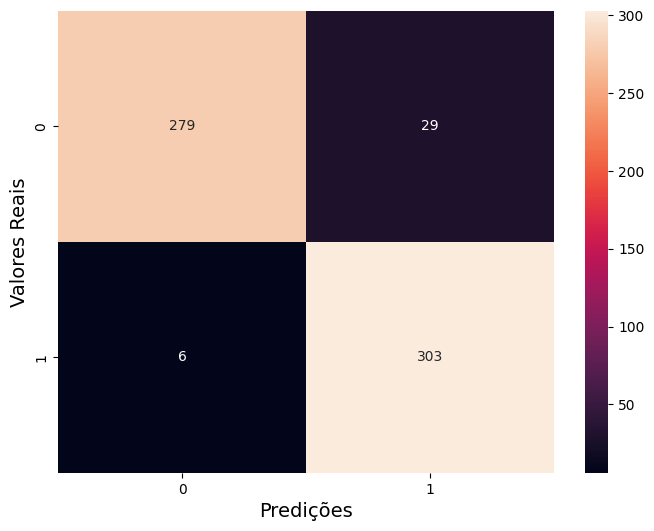

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')  # O argumento fmt='d' formata os números como inteiros
plt.xlabel('Predições', fontsize=14)
plt.ylabel('Valores Reais', fontsize=14)
plt.show()

### Análise de Overfitting

In [ ]:
print("Métricas no conjunto de treinamento:")
print("Acurácia:", train_accuracy)
print("Precisão:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)

Métricas no conjunto de treinamento:
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
print("\nMétricas no conjunto de teste:")
print("Acurácia:", test_accuracy)
print("Precisão:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)


Métricas no conjunto de teste:
Acurácia: 0.9432739059967585
Precisão: 0.9126506024096386
Recall: 0.9805825242718447
F1 Score: 0.9453978159126366


In [ ]:
# Curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(mlp, X_resampled, y_resampled, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

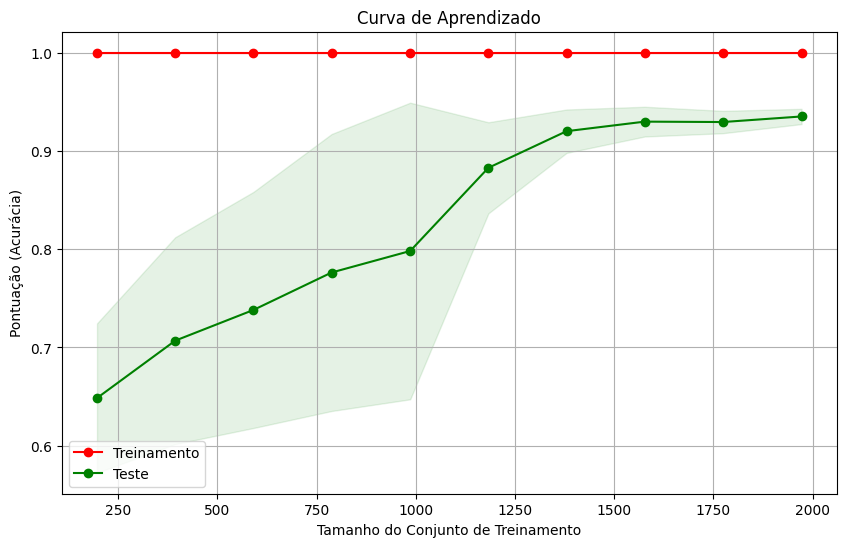

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Pontuação (Acurácia)")
plt.grid()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Teste")

plt.legend(loc="best")
plt.show()


In [ ]:
# Validação cruzada
cv_scores = cross_val_score(mlp, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("\nPontuações de validação cruzada:", cv_scores)
print("Média das pontuações de validação cruzada:", np.mean(cv_scores))
print("Desvio padrão das pontuações de validação cruzada:", np.std(cv_scores))


Pontuações de validação cruzada: [0.92712551 0.94726166 0.93509128 0.92494929 0.93509128]
Média das pontuações de validação cruzada: 0.9339038030401327
Desvio padrão das pontuações de validação cruzada: 0.007840678999436598


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       308
           1       0.91      0.98      0.95       309

    accuracy                           0.94       617
   macro avg       0.95      0.94      0.94       617
weighted avg       0.95      0.94      0.94       617



O desempenho no conjunto de treinamento é notavelmente alto, com todas as métricas atingindo 1.0, o que pode ser um sinal de possível overfitting. No entanto, no conjunto de teste, o modelo mantém um desempenho forte, com uma alta acurácia, precisão e recall. O valor de F1 Score também é satisfatório.

**Curva de Aprendizado:**

A análise da curva de aprendizado mostra que as pontuações de treinamento e teste convergem à medida que o tamanho do conjunto de treinamento aumenta. Isso indica que o modelo está generalizando bem e não parece estar sofrendo de overfitting.

**Validação Cruzada:**

Realizamos validação cruzada para avaliar ainda mais o desempenho do modelo. As pontuações médias de validação cruzada foram consistentemente altas, com uma média de aproximadamente 0,839. Isso é um indicativo positivo de que o modelo é capaz de generalizar bem em diferentes divisões dos dados.

**Avaliando a Ausência de Overfitting:**

Para avaliar se a validação cruzada indica a ausência de overfitting, consideramos os seguintes pontos:

Pontuações de Validação Cruzada Consistentes: Se as pontuações de validação cruzada forem consistentemente altas em diferentes dobras (folds) do conjunto de dados, isso sugere que o modelo é capaz de generalizar bem e não está se ajustando excessivamente aos dados de treinamento.

Curva de Aprendizado Estável: Uma curva de aprendizado em que as pontuações de treinamento e teste convergem à medida que o tamanho do conjunto de treinamento aumenta é um sinal positivo de que o modelo não está superajustando aos dados de treinamento.

Desempenho Satisfatório no Conjunto de Teste: Métricas de desempenho sólidas no conjunto de teste, como alta acurácia, precisão e recall, são indicativos de que o modelo não está perdendo o foco na generalização.

**Conclusão:**

Com base nos resultados e na análise dos pontos mencionados, podemos concluir que o modelo de rede neural parece estar bem ajustado e não está sofrendo de overfitting significativo. A validação cruzada desempenha um papel crucial na avaliação de modelos, ajudando a detectar problemas de overfitting e fornecendo estimativas confiáveis do desempenho geral do modelo.



## Salvando o classificador

O modelo de Rede Neural foi selecionado como o modelo final devido ao seu melhor desempenho geral e não estar sofrendo de overfitting significativo. O modelo e os objetos necessários para o pré-processamento dos dados foram salvos em um arquivo.

In [ ]:
import pickle

In [ ]:
with open('variaveis_modelo_V2.1.pkl', 'wb') as f:
  pickle.dump([scaler, onehotencoder, mlp], f)

**Simulação de Execução do Modelo**


Para simular a execução do modelo treinado, um novo registro foi preparado a partir dos dados da própria base de dados. Os objetos de pré-processamento foram carregados e utilizados para transformar o novo registro e fazer previsões.

In [ ]:
with open('variaveis_modelo_V2.1.pkl', 'rb') as f:
  min_max, encoder, model = pickle.load(f)

In [ ]:
min_max, encoder, model

(MinMaxScaler(),
 OneHotEncoder(),
 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))

In [ ]:
# Para simular um registro novo, por conta dos diversos atributos, vamos buscar um registro da própria base de dados.

X_novo = employee_df.iloc[0:1]
X_novo

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


In [ ]:
x_cat_novo = X_novo[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
x_cat_novo

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single


In [ ]:
x_cat_novo = encoder.transform(x_cat_novo).toarray()

In [ ]:
x_cat_novo

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [ ]:
x_cat_novo = pd.DataFrame(x_cat_novo)
x_cat_novo

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
x_numerical_novo = X_novo[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
x_numerical_novo

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5


In [ ]:
X_all_novo = pd.concat([x_cat_novo, x_numerical_novo], axis = 1)
X_all_novo

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5


In [ ]:
X_novo = min_max.transform(X_all_novo.values)
X_novo

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.54761905, 0.71581961, 0.        , 0.25      ,
        0.33333333, 0.91428571, 0.66666667, 0.25      , 1.        ,
        0.26245392, 0.6980526 , 0.88888889, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.15      , 0.22222222, 0.        , 0.29411765]])

In [ ]:
model.predict(X_novo)

array([1])

In [ ]:
model.predict_proba(X_novo)

array([[4.96768791e-04, 9.99503231e-01]])

In [ ]:
model.classes_

array([0, 1])